# **Задача классификации. Линейный классификатор**

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое **предсказание наличия у пациента диабета** на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения пима.

Из набора данных в файле (.csv) мы можем найти несколько переменных, некоторые из них являются независимыми (несколько переменных медицинских предикторов) и только одна целевая зависимая переменная (**Outcome**).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier #подключаю линейный классификатор

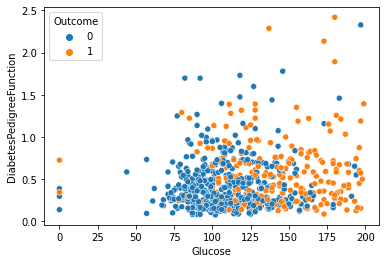

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_control.csv', delimiter = ',')
df_cut = df[['Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
df_cut = df_cut.dropna()

sns.scatterplot(data = df_cut, x = 'Glucose', y = 'DiabetesPedigreeFunction', hue = 'Outcome')

Гипотеза: здоровые и больные образуют два облака. Эти облака можно попытаться разделить прямой линией. И далее, когда будут приходить новые объекты, мы будем смотреть по какую сторону от прямой лежит объект, такой у него и будет предсказываемый признак.

Линейный классификатор тоже требует нормировки данных. Делается это также, как и в методе KNN.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2)) #обучаем нормировщик нашим данным, показываем ему, какой масштаб они имеют
arr = scaler.transform(df_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2)) #а вот уже функция transform их нормирует
#теперь наши данные имеют единый масштаб

In [ ]:
#создаем модель иск.интеллекта
model = SGDClassifier()
model.fit(arr,                                #загружаем тренировочную выборку (после нормировки наша тренировочная выборка имеет имя arr)  
          y = df_cut['Outcome'].values)       #в качестве точных ответов загружаем сюда дигнозы - объекты из тренировочной выборки
#теперь наша модель ИИ натренирована

SGDClassifier()

**Загружаем тестовую выборку для оценки качества ее работы:**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_test.csv', delimiter = ',')
df_test_cut = df_test[['Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
df_test_cut = df_test_cut.dropna()

#отнормируем таблицу, т.к. метод Линейной регрессии работает с нормированными данными
arr_test = scaler.transform(df_test_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2))

In [ ]:
#внимание: прогоняем объекты тестовой выборки через функцию predict нашей модели
df_test_cut['Predicted'] = model.predict(arr_test)

In [ ]:
df_test_cut.head(10 )

,Glucose,DiabetesPedigreeFunction,Outcome,Predicted
0,98,0.430,0,0
1,154,0.164,0,1
2,165,0.631,0,1
3,99,0.551,0,0
4,68,0.285,0,0
5,123,0.880,0,0
6,91,0.587,0,0
7,195,0.328,1,1
8,156,0.230,1,1
9,93,0.263,0,0


In [ ]:
#строим матрицу сопряженностей (матрицу ошибок)
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Outcome'])

Outcome,0,1
Predicted,,
0,59,24
1,4,13


In [ ]:
df_test_cut['Code'] = '0'    #добавим столбец, значение кот-го =0, если модель НЕ ошиблась
df_test_cut.loc[(df_test_cut['Outcome'] == 0) & (df_test_cut['Predicted'] == 1), 'Code'] = '1'  #=1, если истинное значение 0, а предсказана 1
df_test_cut.loc[(df_test_cut['Outcome'] == 1) & (df_test_cut['Predicted'] == 0), 'Code'] = '2'  #=2, если истинное значение 1, а предсказан 0

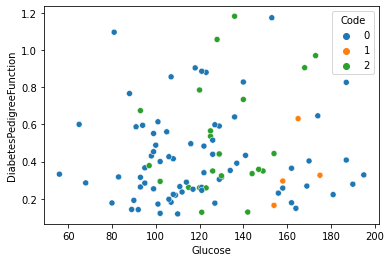

In [ ]:
sns.scatterplot(data = df_test_cut,
                x = 'Glucose',
                y = 'DiabetesPedigreeFunction',
                hue = 'Code',
                )
#график показывает, где модель отработала верно, а где ошиблась (точки трёх цветов)

**Метрики качества задачи классификации:**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print(accuracy_score(df_test_cut['Predicted'], df_test_cut['Outcome']))
#это процент правильно классифицированных объектов

0.72


***К сожалению точность линейного классификатора (72% правильно классифицированных объектов) оказалась ниже, чем в методе 3х ближайших соседей (75%).***

In [ ]:
print(precision_score(df_test_cut['Predicted'], df_test_cut['Outcome'], average = None, zero_division = 1))
print(recall_score(df_test_cut['Predicted'], df_test_cut['Outcome'], average = None, zero_division = 1))

[0.93650794 0.35135135]
[0.71084337 0.76470588]
